# Introduction
To run an effective business, a company must dedicate money and resources to hire people who fit their organization. The cost of hiring an employee is one of the most expensive investment to be made. It takes a lot of patience, skills, money and time.

Small busines owners spend around 40% of their working hours on tasks that do not generate any income, such as hiring (https://www.entrepreneur.com/article/217866). Hiring agencies work on a model where they are paid if they successfully recruit a new candidate. The price for such a service is anywhere from 15 to 25% of the employee’s annual salary, with more senior positions on the higher end of the scale (https://www.forbes.com/sites/kensundheim/2013/09/19/331/?sh=6563dbf4caa5).

Another big resource sink is the onbording and training of new employees. An average company loses anywhere between 1% and 2.5% of their total revenue on the time it takes to bring a new hire up to speed (https://blog.hubspot.com/marketing/how-to-hire-effective-marketers). Several studies have shown that it takes approximately $4000-$8000 to hire an employee in a company of 500 employees, with around 42-52 days to fill a position on average (https://toggl.com/blog/cost-of-hiring-an-employee)

A solution proposed is the development of a system which could predict which employees are likely to quit based on extensive HR data. A data set made by IBM data scientist will be used for prediction and can be found at https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset. The sample dataset provides 35 columns which  includes some of the following:
 - Education
 - Environment Satisfaction
 - Job Involvment
 - Job Satisfaction
 - Perfromance Rating
 - Relationship Satisfaction
 - Work Life Balance

### Imports


In [30]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

# Analysis/Modeling


Let's start by reading our dataset and gathering some high level information and statistics.

In [31]:
df = pd.read_csv('./Dataset/Human_Resources.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [33]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [34]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations
for col in df.columns:
    print('Number of unique '+ col +' values: '+ str(df[col].nunique()))

Number of unique Age values: 43
Number of unique Attrition values: 2
Number of unique BusinessTravel values: 3
Number of unique DailyRate values: 886
Number of unique Department values: 3
Number of unique DistanceFromHome values: 29
Number of unique Education values: 5
Number of unique EducationField values: 6
Number of unique EmployeeCount values: 1
Number of unique EmployeeNumber values: 1470
Number of unique EnvironmentSatisfaction values: 4
Number of unique Gender values: 2
Number of unique HourlyRate values: 71
Number of unique JobInvolvement values: 4
Number of unique JobLevel values: 5
Number of unique JobRole values: 9
Number of unique JobSatisfaction values: 4
Number of unique MaritalStatus values: 3
Number of unique MonthlyIncome values: 1349
Number of unique MonthlyRate values: 1427
Number of unique NumCompaniesWorked values: 10
Number of unique Over18 values: 1
Number of unique OverTime values: 2
Number of unique PercentSalaryHike values: 15
Number of unique PerformanceRati

In [35]:
#Checking null values
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
DailyRate                  0
Department                 0
                          ..
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Length: 35, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E23A354588>,
      dtype=object)

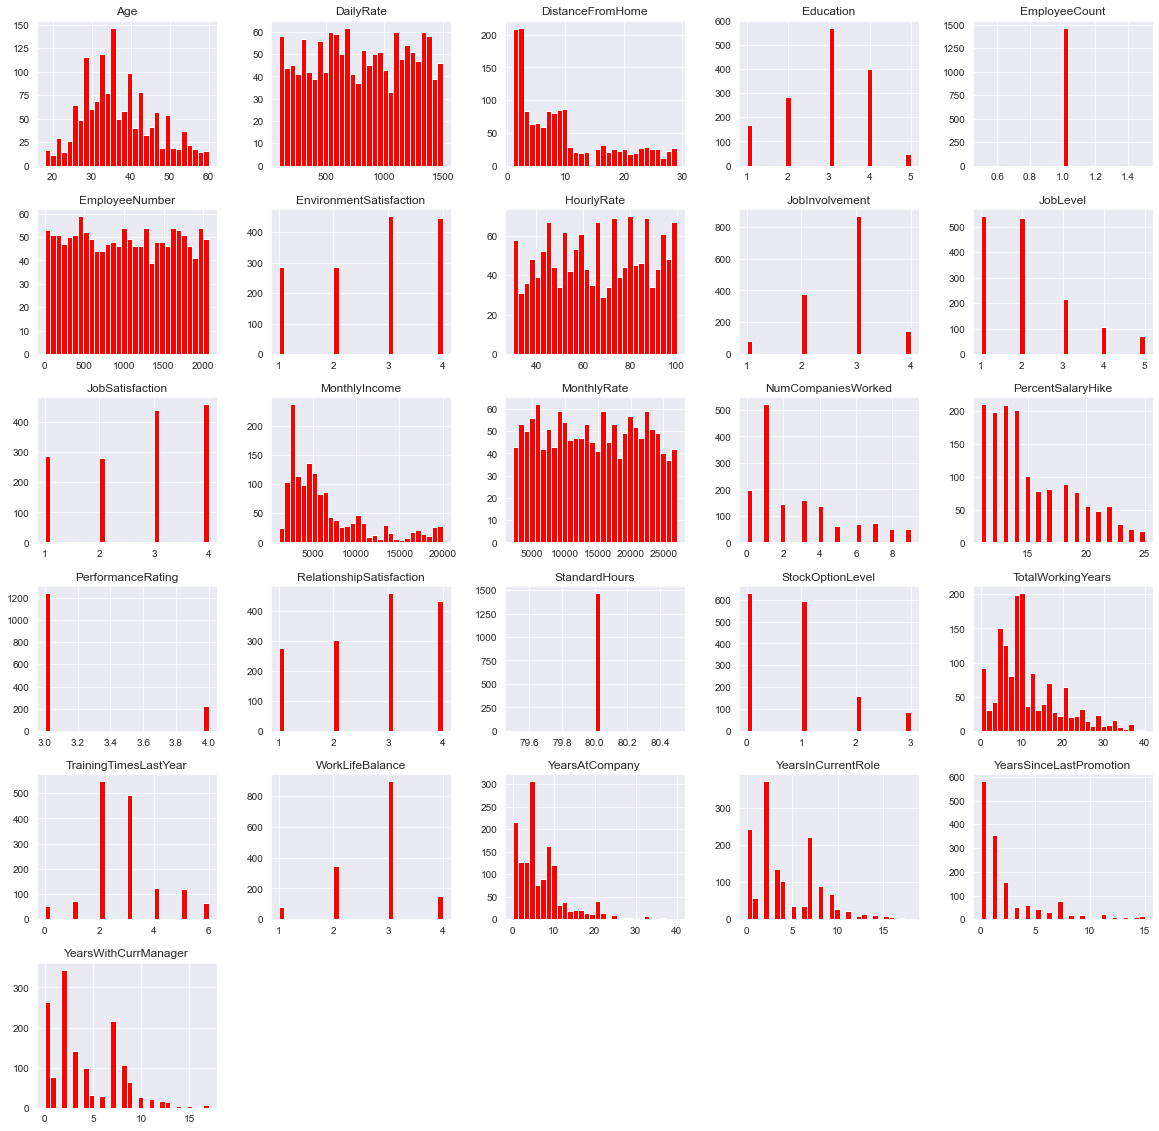

In [36]:
#Plotting graphs to see distributions and general trends
df.hist(bins=30,color='red',figsize = (20,20))

The first observation that can be made from the plots above is that several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy, with these two being right skewed. Additionaly, it makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other. Let's drop 'EmployeeNumber' as well s it is an ID, a useless variable in our analysis and predictions.

In [37]:
df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1, inplace=True)

Let's see how many employees left the company! 

Text(0.5, 1.0, 'Attrition Count')

Number of employees = 1470
Percentage of employees that left = 16.122448979591837%
Percentage of employees that stayed = 83.87755102040816%


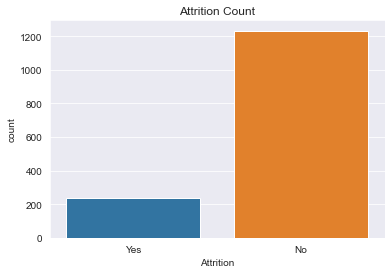

In [38]:

sns.countplot(data=df, x='Attrition')
plt.title('Attrition Count')

pct_left = len(df[df['Attrition']=='Yes'])/len(df)*100
pct_stayed = len(df[df['Attrition']=='No'])/len(df)*100

print('Number of employees = '+str(len(df)))
print('Percentage of employees that left = '+str(pct_left)+'%')
print('Percentage of employees that stayed = '+str(pct_stayed)+'%')

The above graph shows the attrition count for IBM imployees. 16.1% of the 1470 employees left the company while the remaining 83.8% chose to stay. In addition, the plot showcases that we are dealing with an imbalanced dataset, which is important when evaluating prediction model accuracies later on. 

Next, let's look at some general statisitcs for both these groups seperately.

In [39]:
df_stayed = df[df['Attrition']=='No']
df_left = df[df['Attrition']=='Yes']

print('Employees that stayed general statistics:')
df_stayed.describe()

print('Employees that left general statistics:')
df_left.describe()


Employees that stayed general statistics:


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


Employees that left general statistics:


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


Compare the mean and std dev of the employees who stayed and left, the following observations can be made:
- Average age of the employees who stayed is higher compared to who left.
- Rate (Hourly) of employees who stayed is higher.
- Employees who stayed lived closer to home, decreasing commute times.
- Employees who stayed are generally more satisifed with their jobs and the working environment
- Employees who stayed tend to have higher stock option level

To visualize all features and their correlation with each other, we can utilize Seaborn correlation matrix function.

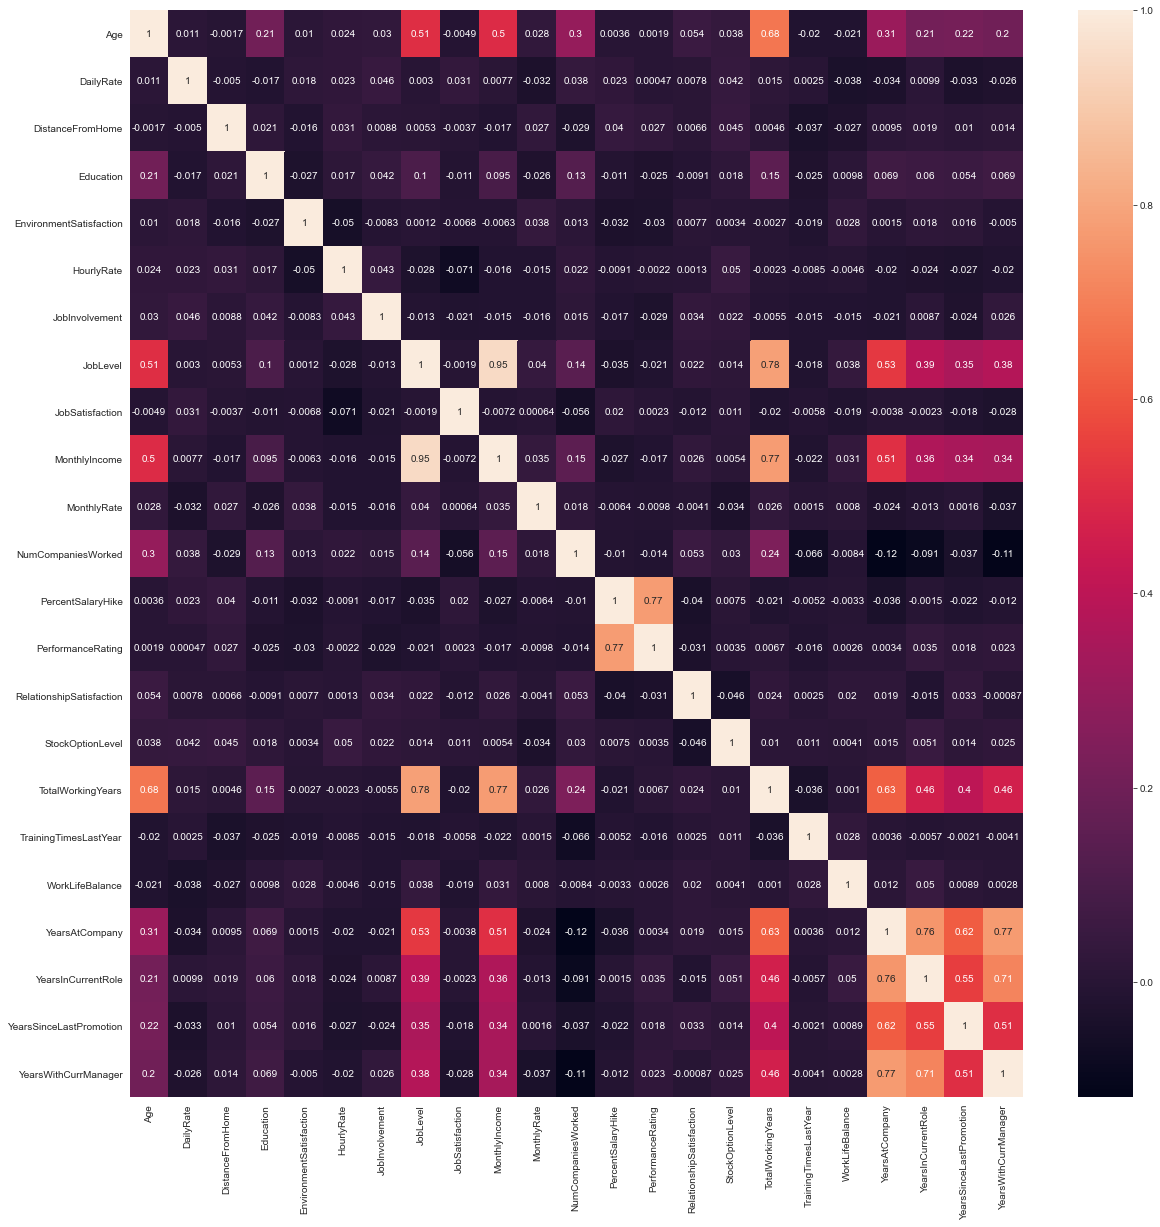

In [40]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,ax=ax)

The correlation matrix shows highly correlated (as we approach 1) and highly uncorrelated features. Job level is strongly correlated with total working hours. This infers that to move up in the company's hierarchy, one must work hard.
Monthly income is strongly correlated with Job level as well, as the higher position are paid more for their time. It is also strongly correlated with total working hours. 
In majority of cases, upper management and management in general require previous experience which naturally comes with time. It is therefore agreeable that age is stongly correlated with monthly income.

A relationship that is worth looking at is that of attrition and age.

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Attrition and Age relationship')

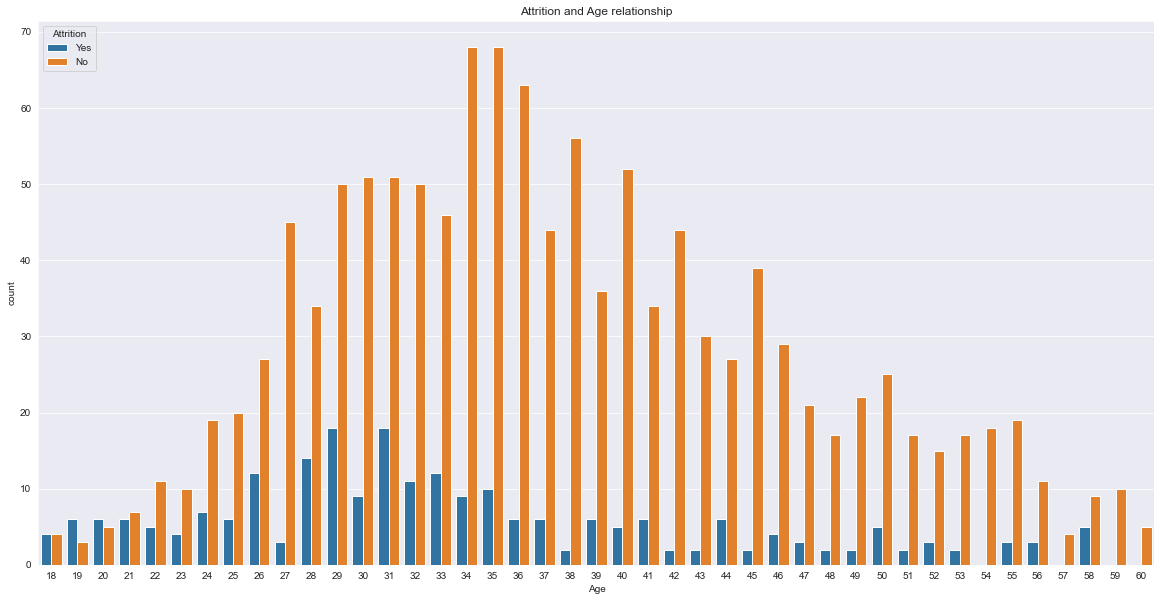

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Age',hue='Attrition')
plt.title('Attrition and Age relationship')

Lots of people tend to leave between age 28 and 33, with peaks at 29 and 31. A reason for this could be that they want to look for new opportunities, more money, live closer to home, start family etc...
Older people have higher chance of staying since they have reached their potential or are comfortable in their position.

Other relationships that have to be explored are that of:
- Attrition and marital status
- Attrition and job position
- Attrition and time spent on job
- Attrition and job level

<Figure size 1440x1800 with 0 Axes>

Text(0.5, 1.0, 'Attrition and marital status relationship')

Text(0.5, 1.0, 'Attrition and job position relationship')

Text(0.5, 1.0, 'Attrition and time spent on job relationship')

Text(0.5, 1.0, 'Attrition and job level relationship')

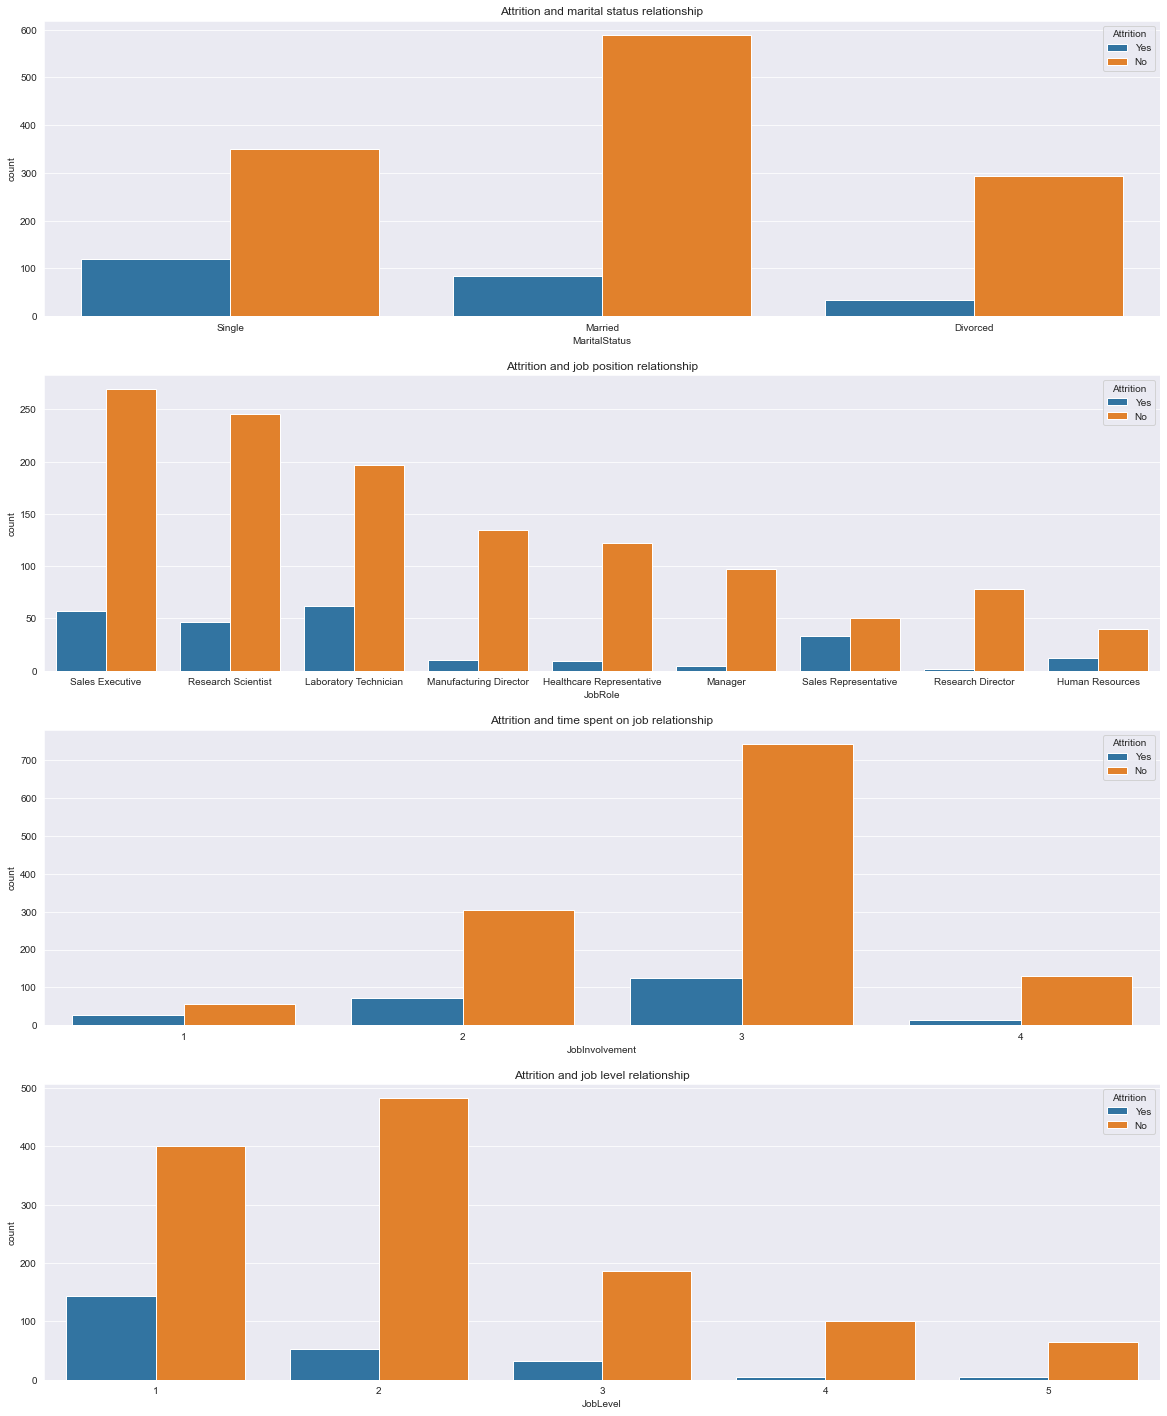

In [42]:
plt.figure(figsize=(20,25))

plt.subplot(411)
sns.countplot(data=df,x='MaritalStatus',hue='Attrition')
plt.title('Attrition and marital status relationship')

plt.subplot(412)
sns.countplot(data=df,x='JobRole',hue='Attrition')
plt.title('Attrition and job position relationship')

plt.subplot(413)
sns.countplot(data=df,x='JobInvolvement',hue='Attrition')
plt.title('Attrition and time spent on job relationship')


plt.subplot(414)
sns.countplot(data=df,x='JobLevel',hue='Attrition')
plt.title('Attrition and job level relationship')


From the above, the following can be observed:
- Single employees have an increased tendency to leave compared to married and divorced employees.
- Sales Representatives tend to leave compared to any other job. On a surface level, these could be attributed to many factors.
- Less involved employees tend to leave the company.
- Less experienced (low job level) are more prone to leave the company. Competition at the top is fierce, and not many employees leave when they reach the higher levels in IBM.

In the next plot, we introduce a Kernel Density Estimate (KDE), which is a plot used for visualizing the Probability Density of a continuous variable, such as the distance an employee commutes to work per day. 

<Figure size 864x504 with 0 Axes>

Text(0.5, 0, 'Distance From Home')

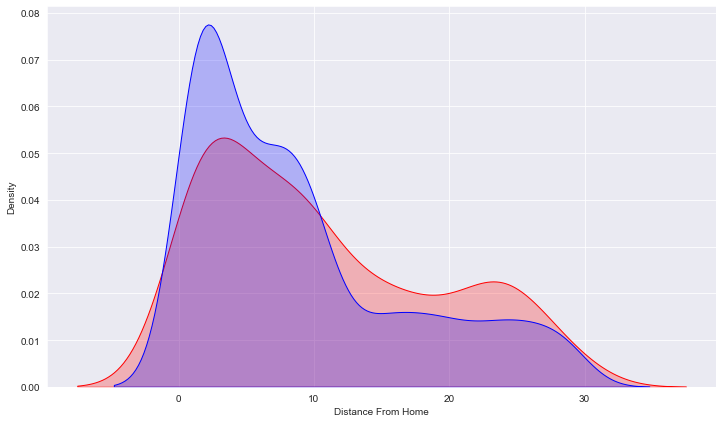

In [43]:
plt.figure(figsize=(12,7))

sns.kdeplot(df_left['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(df_stayed['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Distance From Home')

By distribution, more people seem to leave as distance goes up. However, this is only to a certain distance, before not making a huge impact.

Next, let's plot the KDE for total working years for employees.

<Figure size 864x504 with 0 Axes>

Text(0.5, 0, 'Total Working Years')

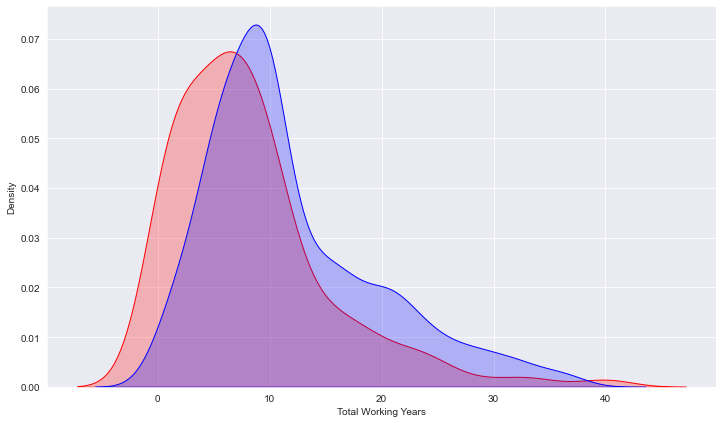

In [44]:
plt.figure(figsize=(12,7))

sns.kdeplot(df_left['TotalWorkingYears'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(df_stayed['TotalWorkingYears'], shade = True, label = 'Employees who Stayed', color = 'b')

plt.xlabel('Total Working Years')

More people seem to stay as total working years goes up (especially at around 7 years).

Another relationship that is worthwhile to observe is the relationship between attrition and the years an employee is with their current manager.

<Figure size 864x504 with 0 Axes>

Text(0.5, 0, 'Years With Current Manager')

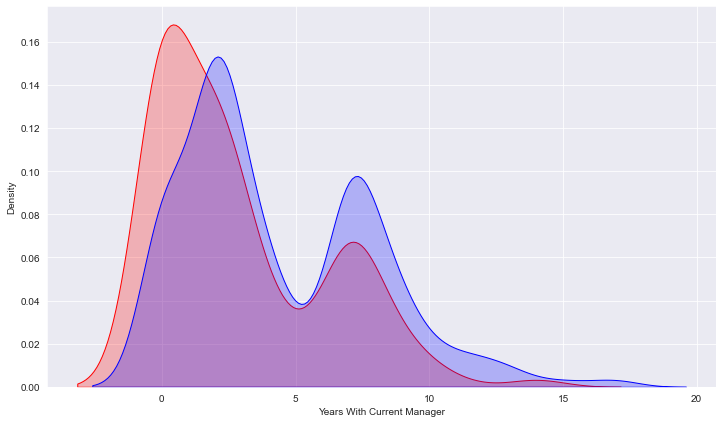

In [45]:
plt.figure(figsize=(12,7))

sns.kdeplot(df_left['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(df_stayed['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Years With Current Manager')

From the above graph, the less time a employee is with a particular manager, the higher the chance of leaving is. However, as soon as the relationship psses 5 years, more people would stay at the company.

Next, the relationship between gender and monthly income.

<Figure size 1080x720 with 0 Axes>

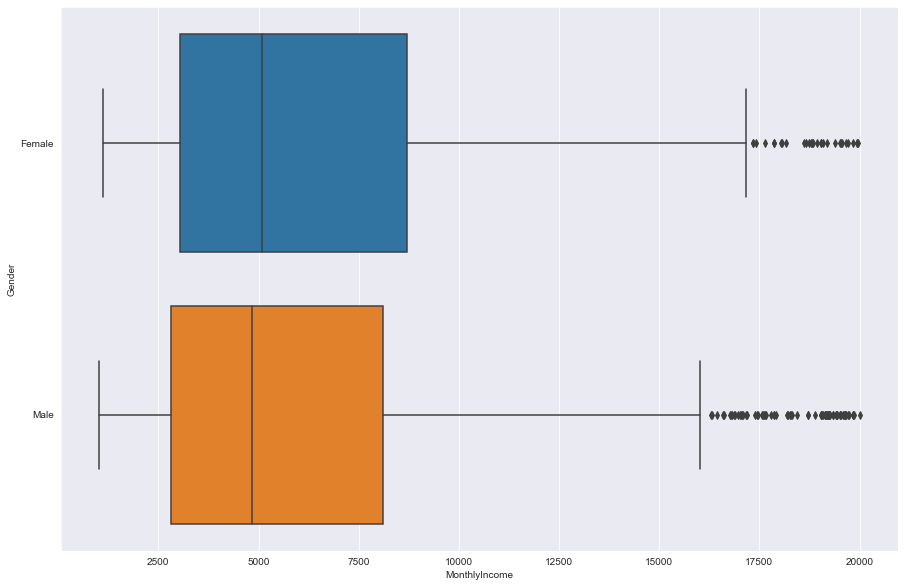

In [46]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome',y='Gender',data=df)

The average salaries per gender are comparable (almost the same). In fact, females get paid more at IBM. Let's see the monthly income vs. job role

<Figure size 1080x720 with 0 Axes>

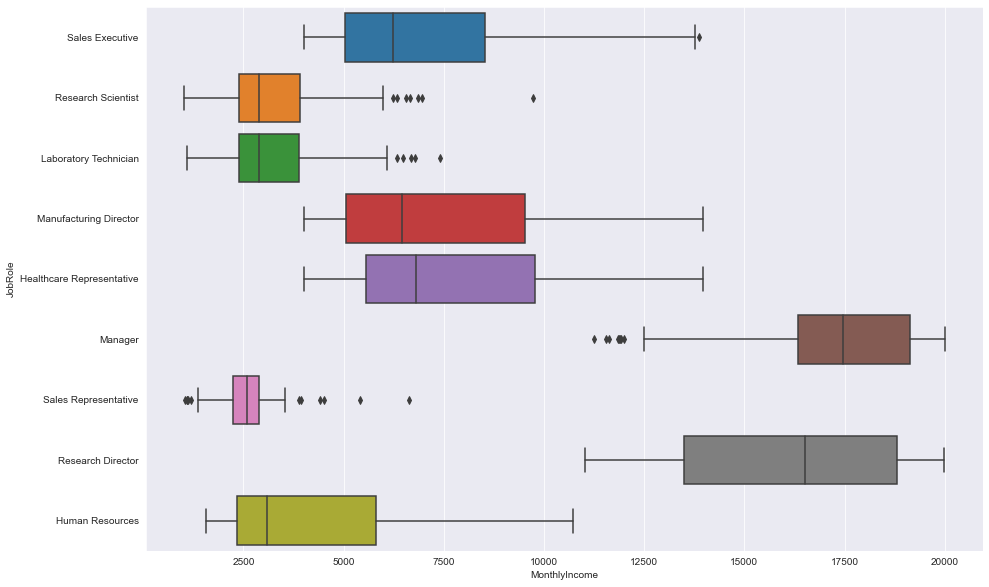

In [47]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = df)

# Prediciton Models

We will try out a few classification models and see which ones perform best in terms of accuracy. The models will use the concepts of logistical regression, random forest and deep learning.

### Logistic Regression
Before we begin with prediction, we need to clean up our data by preprocessing. Let's begin by grabbing all categorical data first.

In [48]:
df.head(1)
df['OverTime'].nunique()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5


2

Attrition and OverTime column has Yes or No as the only values it can take, so we can apply function to change these values to 0 and 1 for the model processing. Similarly, the rest of the categorical data columns will have one hot encoding applied to them by using a special function (too many unique values).

The dataset is then split into a training and testing sub-datsets.

In [49]:

df['Attrition']=df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime']=df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

#Apply one hot encoding to categorical columns
df_encoded = pd.get_dummies(df,columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], drop_first=True)
df_encoded = pd.DataFrame(df_encoded)

X = df_encoded.drop(['Attrition'],axis=1)
y = df_encoded['Attrition']

#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


Applying minmax scaling so that all numbers are on the same scale to avoid having small and large numbers.

In [50]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

Applying logistic regression and confusion matrix.

In [51]:
### LOGISTIC REGRESSION!
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

LogisticRegression()

Accuracy 88.31521739130434 %


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       308
           1       0.72      0.47      0.57        60

    accuracy                           0.88       368
   macro avg       0.81      0.72      0.75       368
weighted avg       0.87      0.88      0.87       368



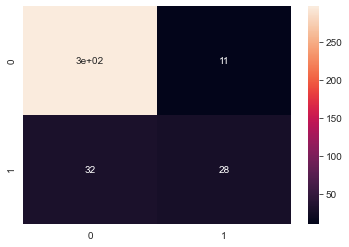

In [52]:
#KPIs
print("Accuracy {} %".format( 100 * accuracy_score(y_test,y_pred)))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

As this is an unbalanced dataset, the use of precision is not a good metric for evaluation. Since we are interested in both false positives and false negatives as equally important, we can use the F1 score. The F1 score is useful in providing the harmonic mean between two classifcation variables, the precision of one categorical target variable and the recall of the other. For this model, the F1 score is 88%.

### Random Forest Classifier

In [53]:
### Random Forest Clssifier
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)

rfc_pred = rfc_model.predict(X_test)

RandomForestClassifier()

Accuracy 85.86956521739131 %


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       308
           1       0.90      0.15      0.26        60

    accuracy                           0.86       368
   macro avg       0.88      0.57      0.59       368
weighted avg       0.86      0.86      0.81       368



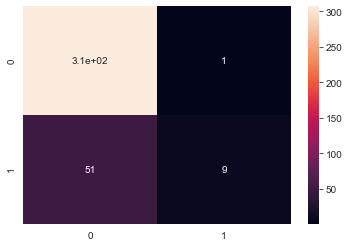

In [54]:
#KPIs
print("Accuracy {} %".format( 100 * accuracy_score(y_test,rfc_pred)))
cm = confusion_matrix(y_test,rfc_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, rfc_pred))

#Worse recall for class 1

The F1 score for the random forest classifier is  86%. However, it does have a much worse recall for class 1.

### Deep Learning

In [55]:
### DEEP LEARNING MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
dl_model = Sequential()

dl_model.add(Dense(units=500, activation='relu'))
dl_model.add(Dropout(0.5))

dl_model.add(Dense(units=500, activation='relu'))
dl_model.add(Dropout(0.5))

dl_model.add(Dense(units=500, activation='relu'))
dl_model.add(Dropout(0.5))

dl_model.add(Dense(units=1, activation='sigmoid'))
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1,patience=5)

In [58]:
dl_model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
dl_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,callbacks=[early_stop])

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: target=1163    0
660     1
323     1
686     0
464     0
       ..
646     0
783     0
756     0
272     0
1091    0
Name: Attrition, Length: 1102, dtype: int64

In [ ]:
dl_pred = dl_model.predict_classes(X_test)

Text(0.5, 1.0, 'Model Loss Progress During Training')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

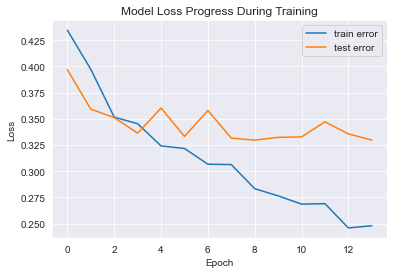

In [ ]:
plt.plot(dl_model.history.history['loss'], label='train error')
plt.plot(dl_model.history.history['val_loss'], label='test error')
plt.legend()
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       311
           1       0.59      0.51      0.55        57

    accuracy                           0.87       368
   macro avg       0.75      0.72      0.74       368
weighted avg       0.86      0.87      0.87       368



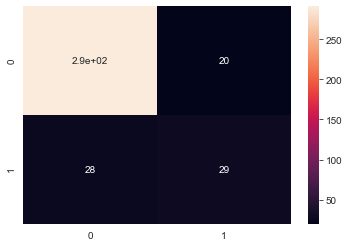

In [ ]:
#KPIs
cm = confusion_matrix(y_test,dl_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, dl_pred))

The deep learning model has an F1 score accuracy of 87%, but with a slightly higher recall score for Class 1.

# Results
At the begining of this analysis, we wanted to understand what factors made certain employees leave and stay.

A summary of the results found can be found below.
- The average age of the employees who stayed is higher compared to those who left.
- Employees who have a higher rate (Hourly) ie. better compensation packages have a higher chance of staying.
- Employees who stayed lived closer to home, decreasing commute times.
- Employees who stayed are generally more satisifed with their jobs and the working environment.
- Employees who stayed tend to have higher stock option level.
- Single employees have an increased tendency to leave compared to married and divorced employees.
- Sales Representatives tend to leave compared to any other job. On a surface level, these could be attributed to many factors.
- Less involved employees tend to leave the company. This is to mean employees that are really involved in their work.
- Less experienced (low job level) are more prone to leave the company. Competition at the top is fierce, and not many employees leave when they reach the higher levels in IBM.
- More people leave the company as distance goes up. However, this is only to a certain distance, before not making a huge impact.
- More people seem to stay as total working years goes up (especially at around 7 years).
- The less time a employee is with a particular manager, the higher the chance of leaving is. However, as soon as the relationship passes 5 years, more people would stay at the company.

# Next Steps


From the findings of this report, some measures can be taken to increase employee attrition. A lot of the issues outlined in the results section stem from a lack of worklife balance, ineffective managers, an employee trying to progress his career but not given the opportunity to, pay and other benefits. This  can all be attributed to company culture.

It is essential to  reduce employee turnover as it impacts the profitability. It is also increasingly challenging to find the right people with the right set of skills. Furthermore, it is costly to hire to begin with as lost time cannot be replaced.

The following recommendations can be made to try to alleviate the issue.
- Hire the right people who have passion for the tasks and field. This increases engagement.
- Write a job description which accurately describes what a potential employee would perform day to day. This allows the employee to make an informed decision and both company/employee would not take each other's time if it is known what the expectations are.
- Keep up to date what the compensation packages for your competitiors and try to match/offer more.
- Monitor the work environment in search of toxic employees and asking for feedback on what employees want to see improved.
- Engage with employees by thanking them for their contributions. Rewarding and acknowledging workers is of vital importance.
- Offer job flexibility for people who need to commute long distance if possible. This imporves work life balance.
- Allow opportunities for advancement and continued learning within the company. Hire from within whenever possible.